In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("../abalone.csv", index_col=0)
df

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
id,,,,,,,,,
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9


Text(0.5, 1.0, 'Rings')

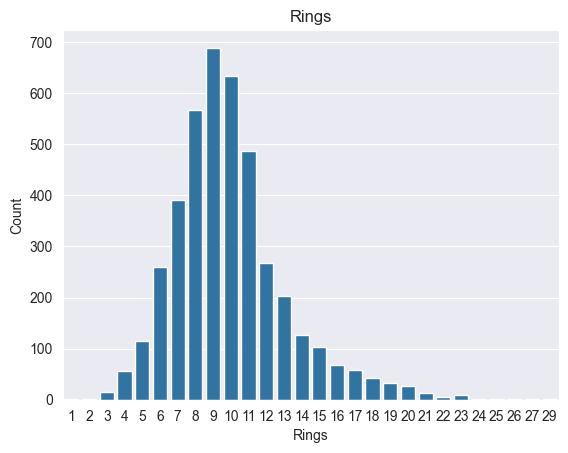

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# 레이블 갯수 확인 (그래프)
sns.countplot(data = df, x="Rings")
plt.xlabel("Rings")
plt.ylabel("Count")
plt.title("Rings")

In [4]:
X=df.drop('Rings',axis=1)
X = pd.get_dummies(X, columns=['Sex'], drop_first=True)
X.head()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Sex_I,Sex_M
id,,,,,,,,,
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,False,True
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,False,True
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,False,False
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,False,True
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,True,False


In [5]:
y=df['Rings']
y.value_counts()

Rings
9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
27      2
24      2
1       1
26      1
29      1
2       1
25      1
Name: count, dtype: int64

In [6]:
# 결측치 확인
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             0
dtype: int64

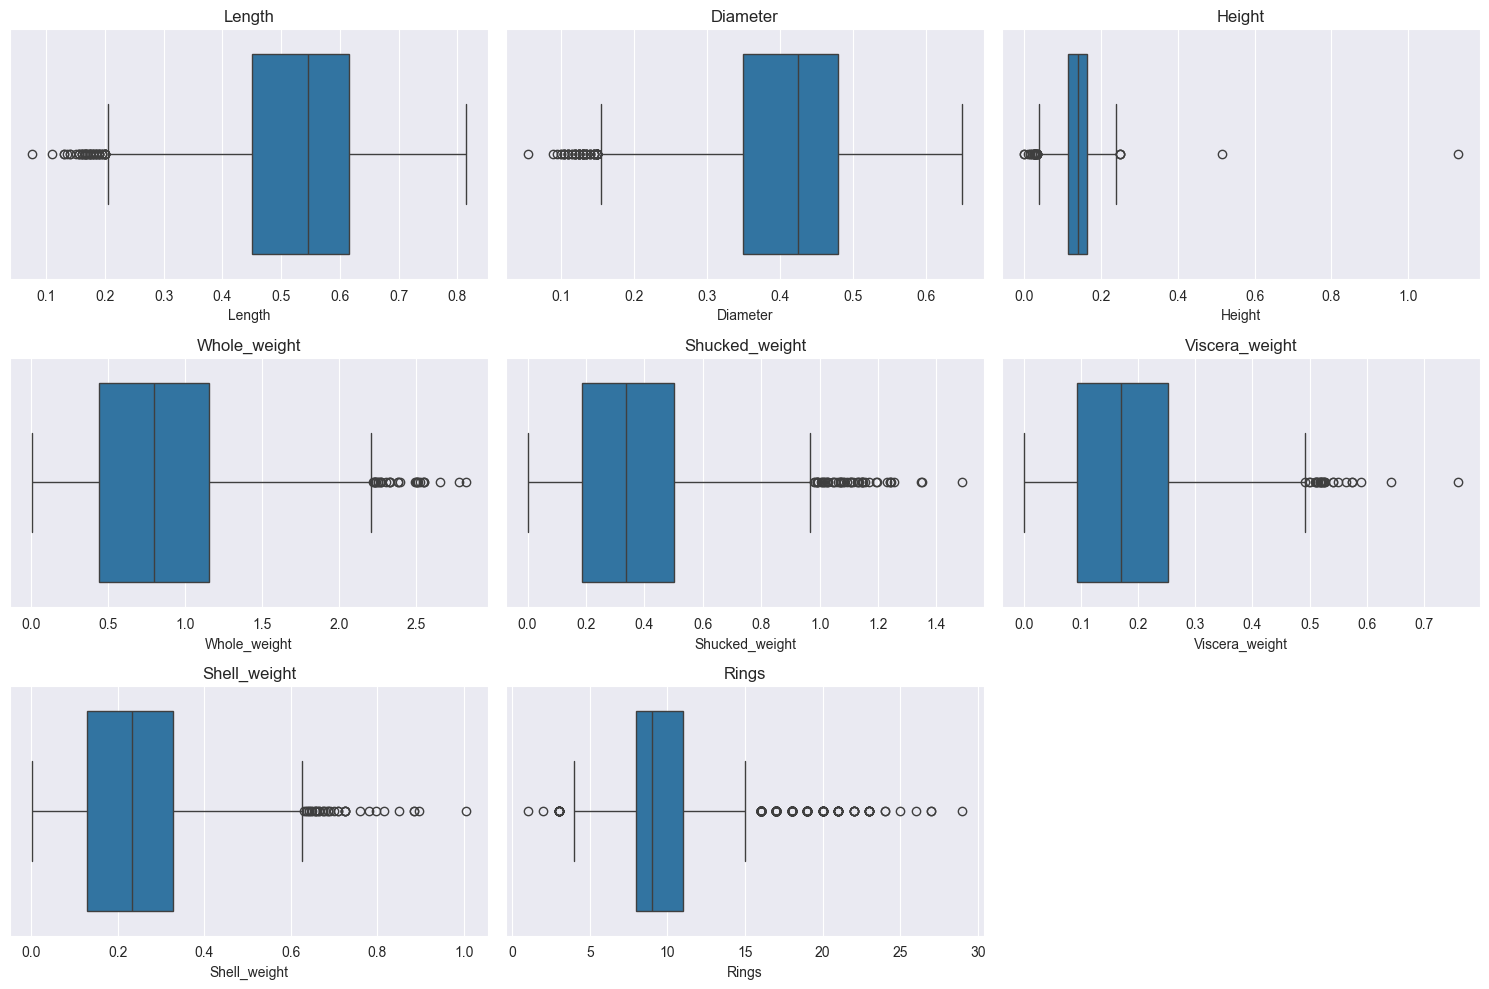

In [7]:
# 데이터프레임의 수치형 칼럼들을 선택
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# 박스플롯을 각 수치형 칼럼에 대해 반복적으로 그리기
plt.figure(figsize=(15, 10))  # 적절한 사이즈로 설정
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(len(numeric_columns) // 3 + 1, 3, i)
    sns.boxplot(x=column, data=df)
    plt.title(column)

plt.tight_layout()  # 레이아웃 조정
plt.show()

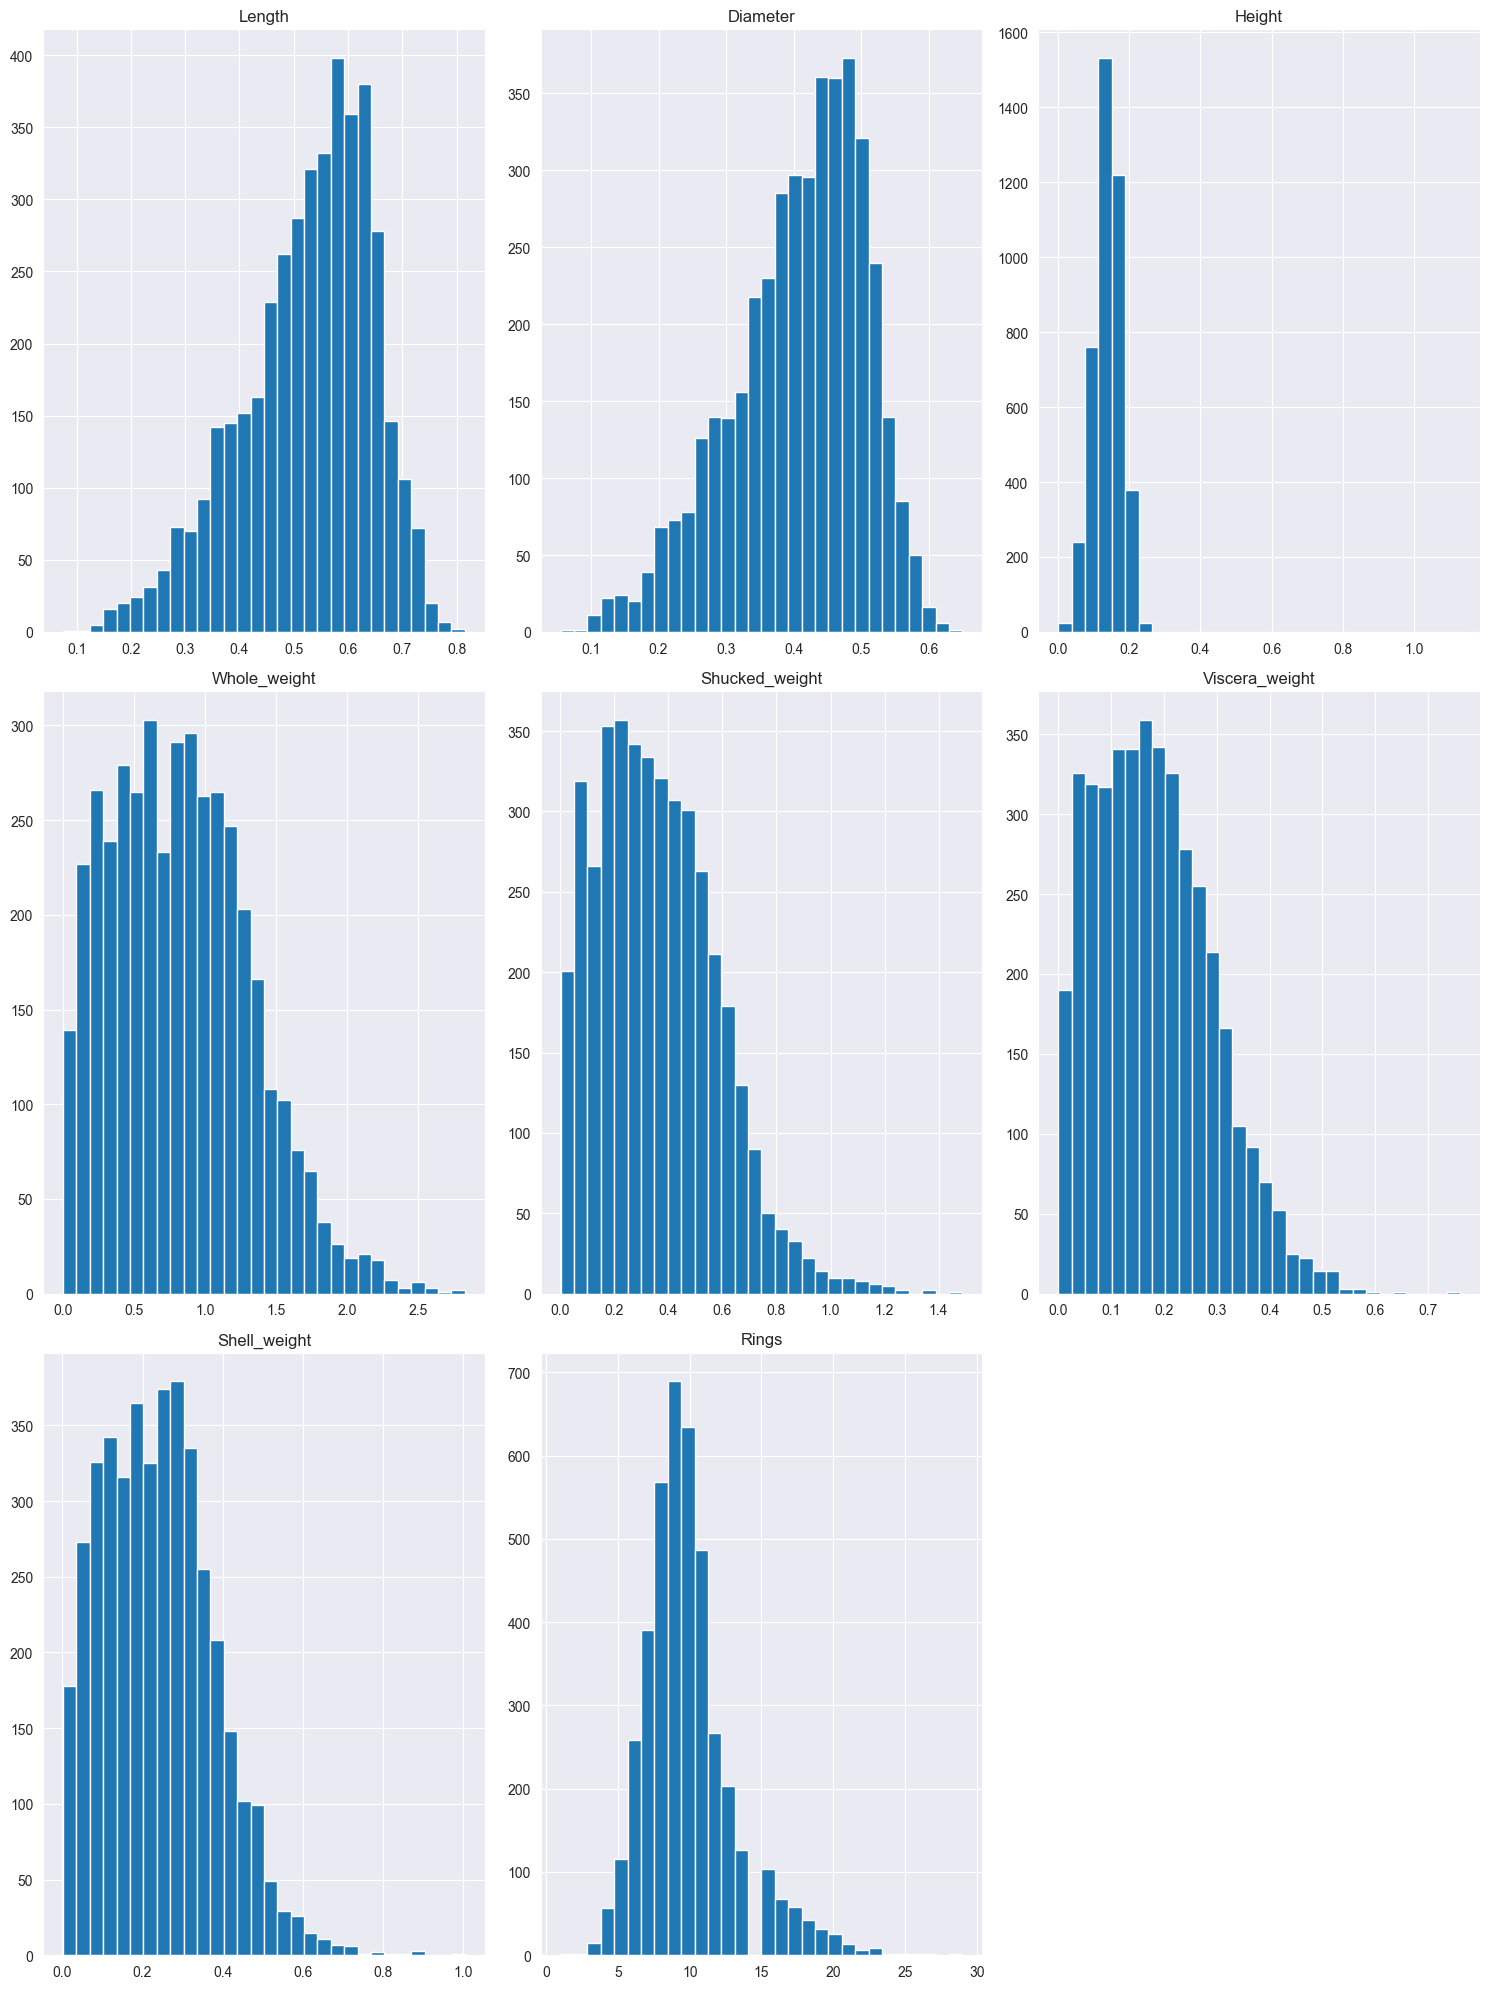

In [8]:
# 각 컬럼별 히스토그램을 그리는 코드
df.hist(figsize=(15, 20), bins=30)  # ax 인수 없이 자동으로 서브플롯 생성
plt.tight_layout()  # 서브플롯 간격을 자동으로 조정
plt.show()

In [9]:
X = X.values
X.shape

(4177, 9)

In [10]:
from tensorflow.keras.utils import to_categorical

Y = to_categorical(y)
Y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [11]:
print(X.dtype)
print(Y.dtype)

object
float32


In [12]:
X = X.reshape((X.shape[0], X.shape[1], 1))
X.shape

(4177, 9, 1)

In [13]:
X = X.astype('float32')

In [14]:
print(X)
print(X.dtype)

[[[0.455]
  [0.365]
  [0.095]
  ...
  [0.15 ]
  [0.   ]
  [1.   ]]

 [[0.35 ]
  [0.265]
  [0.09 ]
  ...
  [0.07 ]
  [0.   ]
  [1.   ]]

 [[0.53 ]
  [0.42 ]
  [0.135]
  ...
  [0.21 ]
  [0.   ]
  [0.   ]]

 ...

 [[0.6  ]
  [0.475]
  [0.205]
  ...
  [0.308]
  [0.   ]
  [1.   ]]

 [[0.625]
  [0.485]
  [0.15 ]
  ...
  [0.296]
  [0.   ]
  [0.   ]]

 [[0.71 ]
  [0.555]
  [0.195]
  ...
  [0.495]
  [0.   ]
  [1.   ]]]
float32


In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0) 

In [16]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

# Conv1D 모델 생성
model = Sequential()
model.add(Conv1D(64, 3, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(30, activation='softmax'))  # 분류 문제일 경우

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [17]:
model_history=model.fit(x=X_train, y=y_train, epochs=30, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/30


2024-09-25 22:07:18.168878: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


105/105 [==============================] - 1s 3ms/step - loss: 2.6399 - accuracy: 0.1691 - val_loss: 2.4003 - val_accuracy: 0.2225
Epoch 2/30
105/105 [==============================] - 0s 1ms/step - loss: 2.2869 - accuracy: 0.2149 - val_loss: 2.2702 - val_accuracy: 0.2225
Epoch 3/30
105/105 [==============================] - 0s 1ms/step - loss: 2.2055 - accuracy: 0.2284 - val_loss: 2.2262 - val_accuracy: 0.2141
Epoch 4/30
105/105 [==============================] - 0s 1ms/step - loss: 2.1719 - accuracy: 0.2397 - val_loss: 2.1892 - val_accuracy: 0.2380
Epoch 5/30
105/105 [==============================] - 0s 1ms/step - loss: 2.1465 - accuracy: 0.2356 - val_loss: 2.1667 - val_accuracy: 0.2524
Epoch 6/30
105/105 [==============================] - 0s 1ms/step - loss: 2.1284 - accuracy: 0.2415 - val_loss: 2.1509 - val_accuracy: 0.2452
Epoch 7/30
105/105 [==============================] - 0s 1ms/step - loss: 2.1049 - accuracy: 0.2502 - val_loss: 2.1420 - val_accuracy: 0.2632
Epoch 8/30
105/10

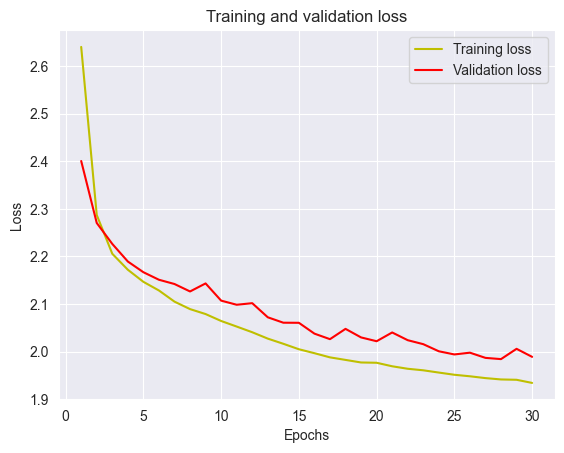

In [18]:
import matplotlib.pyplot as plt

loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

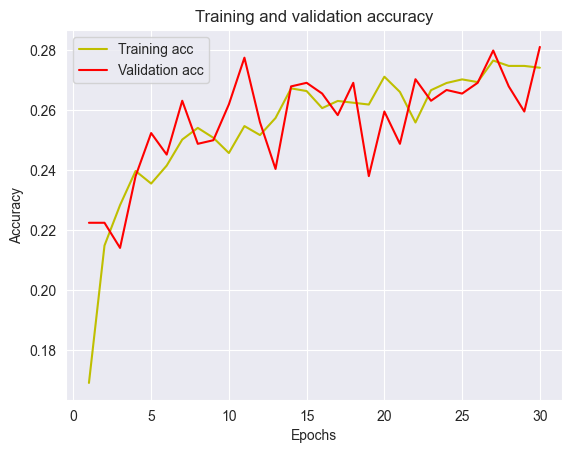

In [19]:
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [20]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class, zero_division=0))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         5
           4       0.23      0.27      0.25        11
           5       0.38      0.42      0.40        33
           6       0.38      0.30      0.33        47
           7       0.38      0.38      0.38        98
           8       0.52      0.27      0.36       113
           9       0.26      0.66      0.38       127
          10       0.18      0.14      0.16       107
          11       0.22      0.36      0.27        95
          12       0.00      0.00      0.00        66
          13       0.07      0.05      0.06        39
          14       0.00      0.00      0.00        26
          15       0.00      0.00      0.00        18
          16       0.11      0.07      0.09        14
          17       0.00      0.00      0.00        10
          18       0.00      0.00      0.00         5
          19       0.00      0.00      0.00         8
          20       0.00    